# Randomized Optimization

In [159]:
import mlrose_hiive

import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time

import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

from mlrose import DiscreteOpt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [160]:
def customQueens(state):
    retval = 0
    for i in range(len(state) - 1):
        for j in range(i+1, len(state)):
            if ((state[i] != state[j]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i))):
                retval += 1
    return retval

def maxSwitches(state):
    retval = 0
    for i in range(len(state) - 1):
        if (state[i] != state[i + 1]):
            retval += 1
    return retval

In [161]:
QueenCustom = True
QueenFitness = mlrose_hiive.CustomFitness(customQueens) if QueenCustom else mlrose_hiive.Queens()
QueenProblemLength = 20 # 7min
QueenProblem = mlrose_hiive.DiscreteOpt(length=QueenProblemLength, fitness_fn=QueenFitness, maximize=QueenCustom, max_val=QueenProblemLength)
QueenInit = np.arange(QueenProblemLength)

coords = [(0, 0), (4, 0), (1, 2), (3, 4), (5, 3), 
            (3, 2), (1, 5), (2, 1), (1, 6), (7, 2), 
            (3, 3), (0, 4), (2, 3), (3, 9), (3, 1),
            (1, 1), (2, 0), (5, 6), (7, 9), (7, 4)]
TSProblemLength = 20
coordsTrimmed = coords[:TSProblemLength]
TSFitness = mlrose_hiive.TravellingSales(coords=coordsTrimmed)
TSProblem = mlrose_hiive.TSPOpt(length=TSProblemLength, fitness_fn=TSFitness, maximize=False)
TSInit = np.arange(TSProblemLength)

OMFitness = mlrose_hiive.OneMax()
OMProblemLength = 20
OMProblem = mlrose_hiive.DiscreteOpt(length=OMProblemLength, fitness_fn=OMFitness)
OMInit = np.random.choice([0, 1], size=(OMProblemLength,))

FPFitness = mlrose_hiive.FourPeaks()
FPProblemLength = 20
FPProblem = mlrose_hiive.DiscreteOpt(length=FPProblemLength, fitness_fn=FPFitness)
FPInit = np.random.choice([0, 1], size=(FPProblemLength,))

MxSFitness = mlrose_hiive.CustomFitness(maxSwitches)
MxSProblemLength = 20
MxSProblem = mlrose_hiive.DiscreteOpt(length=MxSProblemLength, fitness_fn=MxSFitness)
MxSInit = np.random.choice([0, 1], size=(MxSProblemLength,))

fitnesses = [QueenFitness, TSFitness, OMFitness, FPFitness, MxSFitness]
problems = [QueenProblem, TSProblem, OMProblem, FPProblem, MxSProblem]
init_states = [QueenInit, TSInit, OMInit, FPInit, MxSInit]
problemNames = ["N-Queens", "Travelling Salesman", "One Max", "Four Peaks", "Max Switches"]

schedule = mlrose.ExpDecay()

In [162]:
prob = 2
maxIters = 1000
popSize = 100

HC_state, HC_fitness, HC_curve = mlrose_hiive.random_hill_climb(problems[prob], max_attempts=100, max_iters=maxIters, restarts=10, init_state=init_states[prob], curve=True, random_state=1)
SA_state, SA_fitness, SA_curve = mlrose_hiive.simulated_annealing(problems[prob], schedule=schedule, max_attempts=100, max_iters=maxIters, init_state=init_states[prob], curve=True, random_state=1)
GA_state, GA_fitness, GA_curve = mlrose_hiive.genetic_alg(problems[prob], pop_size=popSize, mutation_prob=0.1, max_attempts=100, max_iters=maxIters, curve=True, random_state=1)
MIMIC_state, MIMIC_fitness, MIMIC_curve = mlrose_hiive.mimic(problems[prob], pop_size=popSize, keep_pct=0.2, max_attempts=100, max_iters=maxIters, curve=True, random_state=1, fast_mimic=False)

TypeError: mimic() got an unexpected keyword argument 'fast_mimic'

In [151]:
if(0):
    print(HC_state)
    print(SA_state)
    print(GA_state)
    print(MIMIC_state)

    print(HC_fitness)
    print(SA_fitness)
    print(GA_fitness)
    print(MIMIC_fitness)

    print(HC_curve)
    print(SA_curve)
    print(GA_curve)
    print(MIMIC_curve)

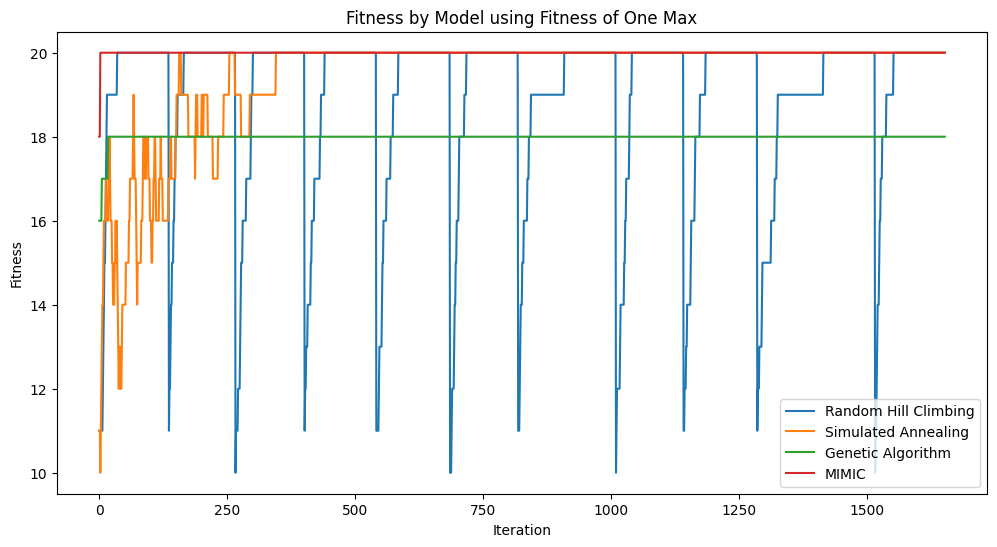

In [152]:
curves = [HC_curve, SA_curve, GA_curve, MIMIC_curve]
curveSizes = [HC_curve.size, SA_curve.size, GA_curve.size, MIMIC_curve.size]
plotSize = max(curveSizes)
maxCurve = np.argmax(curveSizes)

HC_norm_curve = np.concatenate((HC_curve, HC_curve[-1] * np.ones(plotSize - HC_curve.size, dtype=HC_curve.dtype)))
SA_norm_curve = np.concatenate((SA_curve, SA_curve[-1] * np.ones(plotSize - SA_curve.size, dtype=SA_curve.dtype)))
GA_norm_curve = np.concatenate((GA_curve, GA_curve[-1] * np.ones(plotSize - GA_curve.size, dtype=GA_curve.dtype)))
MIMIC_norm_curve = np.concatenate((MIMIC_curve, MIMIC_curve[-1] * np.ones(plotSize - MIMIC_curve.size, dtype=MIMIC_curve.dtype)))

xax = np.arange(plotSize)

fig = plt.figure(1, [12, 6])
ax = fig.add_subplot(111)
ax.plot(xax, HC_norm_curve)
ax.plot(xax, SA_norm_curve)
ax.plot(xax, GA_norm_curve)
ax.plot(xax, MIMIC_norm_curve)
ax.set_title("Fitness by Model using Fitness of " + problemNames[prob])
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])

## Fitness and Time by Problem Size and Problem

In [155]:
starts = [4, 4, 4, 4, 4] # Q, TS, OM, FP, MxS
ends = [8, 20, 40, 40, 20] # Q, TS, OM, FP, MxS

data = np.zeros((5, max(ends) - min(starts) + 1, 4)) # [problem][problemSize][algorithm]
times = np.zeros((5, max(ends) - min(starts) + 1, 4))

In [154]:
prob2 = 1 # Q, TS, OM, FP, MxS

In [156]:
# TAKES 47 MINUTES. TO REDUCE, SET ends TO SMALLER NUMBERS. BOTTLENECKS FOR 40 SAMPLE SIMULATIONS

for j in np.arange(5):
    print(problemNames[j])
    for i in np.arange(starts[j], ends[j] + 1):
        print(i)
        if j == 0:
            test2_fitness = QueenFitness = mlrose.CustomFitness(customQueens) if QueenCustom else mlrose.Queens()
            test2_problem = mlrose.DiscreteOpt(length=i, fitness_fn=test2_fitness, maximize=QueenCustom, max_val=i)
            test2_init = np.arange(i)
        elif j == 1:
            coordsTrimmed2 = coords[:i]
            test2_fitness = mlrose.TravellingSales(coords=coordsTrimmed2)
            test2_problem = mlrose.TSPOpt(length=i, fitness_fn=test2_fitness, maximize=False)
            test2_init = np.arange(i)
        elif j == 2:
            test2_fitness = mlrose.OneMax()
            test2_problem = mlrose.DiscreteOpt(length=i, fitness_fn=test2_fitness)
            test2_init = np.random.choice([0, 1], size=(i,))
        elif j == 3:
            test2_fitness = mlrose.FourPeaks()
            test2_problem = mlrose.DiscreteOpt(length=i, fitness_fn=test2_fitness)
            test2_init = np.random.choice([0, 1], size=(i,))
        else:
            test2_fitness = mlrose.CustomFitness(maxSwitches)
            test2_problem = mlrose.DiscreteOpt(length=i, fitness_fn=test2_fitness)
            test2_init = np.random.choice([0, 1], size=(i,))

        prob = 4
        maxIters = 1000
        popSize = 10

        startTime = time.time()
        HC_state, HC_fitness = mlrose.random_hill_climb(test2_problem, max_attempts=100, max_iters=maxIters, restarts=10, init_state=test2_init, random_state=1)
        t1 = time.time()
        SA_state, SA_fitness = mlrose.simulated_annealing(test2_problem, schedule=schedule, max_attempts=10, max_iters=maxIters, init_state=test2_init, random_state=1)
        t2 = time.time()
        GA_state, GA_fitness = mlrose.genetic_alg(test2_problem, pop_size=popSize, mutation_prob=0.1, max_attempts=100, max_iters=maxIters, random_state=1)
        t3 = time.time()
        MIMIC_state, MIMIC_fitness = mlrose.mimic(test2_problem, pop_size=popSize, keep_pct=0.2, max_attempts=100, max_iters=maxIters, random_state=1, fast_mimic=False)
        t4 = time.time()

        data[j][:][i - starts[prob2]] = [HC_fitness, SA_fitness, GA_fitness, MIMIC_fitness]
        times[j][:][i - starts[prob2]] = [t1 - startTime, t2 - t1, t3 - t2, t4 - t3]

N-Queens
4
5
6
7
8
Travelling Salesman
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
One Max
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


KeyboardInterrupt: 

In [ ]:
plotProb = 4 # Q, TS, OM, FP, MxS

xax = np.arange(starts[plotProb], ends[plotProb] + 1)
sampleNum = ends[plotProb] - starts[plotProb] + 1

probData = data[plotProb][:sampleNum][:]
probTime = times[plotProb][:sampleNum][:]

fig = plt.figure(1, [12, 6])
ax = fig.add_subplot(111)
ax.plot(xax, probData.T[0])
ax.plot(xax, probData.T[1])
ax.plot(xax, probData.T[2])
ax.plot(xax, probData.T[3])
ax.set_title("Fitness by Model using Fitness of " + problemNames[plotProb])
ax.set_xlabel("Problem Size")
ax.set_ylabel("Fitness")
ax.legend(["Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])

In [ ]:
plotProb = 4 # Q, TS, OM, FP, MxS

xax = np.arange(starts[plotProb], ends[plotProb] + 1)
sampleNum = ends[plotProb] - starts[plotProb] + 1

probData = data[plotProb][:sampleNum][:]
probTime = times[plotProb][:sampleNum][:]

fig = plt.figure(1, [12, 6])
ax = fig.add_subplot(111)
ax.plot(xax, probTime.T[0])
ax.plot(xax, probTime.T[1])
ax.plot(xax, probTime.T[2])
ax.plot(xax, probTime.T[3])
ax.set_title("Runtime by Model using Fitness of " + problemNames[plotProb])
ax.set_xlabel("Problem Size")
ax.set_ylabel("Runtime")
ax.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])

In [ ]:
plotProb = 0 # Q, TS, OM, FP, MxS

xax = np.arange(starts[plotProb], ends[plotProb] + 1)
sampleNum = ends[plotProb] - starts[plotProb] + 1

probData = data[plotProb][:sampleNum][:]
probTime = times[plotProb][:sampleNum][:]

fig = plt.figure(1, [12, 6])
ax = fig.add_subplot(111)
ax.scatter(probData.T[0], probTime.T[0])
ax.scatter(probData.T[1], probTime.T[1])
ax.scatter(probData.T[2], probTime.T[2])
ax.scatter(probData.T[3], probTime.T[3])
ax.set_title("Runtime by Fitness using Fitness of " + problemNames[plotProb])
ax.set_xlabel("Fitness")
ax.set_yscale('log')
ax.set_ylabel("Runtime")
ax.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])

# Neural Network Fitting

In [ ]:
wineData = load_wine()

for i in np.arange(100):
    testFrac = i / 200 + 0.2
    trainFeatures, testFeatures, trainTargets, testTargets = train_test_split(wineData.data, wineData.target, test_size = testFrac, random_state = 1)

    one_hot = OneHotEncoder()
    trainTargets = one_hot.fit_transform(trainTargets.reshape(-1, 1)).todense()
    testTargets = np.asarray(one_hot.fit_transform(testTargets.reshape(-1, 1)).todense())

    nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2], activation='relu', algorithm='simulated_annealing', 
                                    max_iters=1000, bias=True, is_classifier=True, learning_rate=0.0001, 
                                    early_stopping=True, clip_max=5, max_attempts=100, random_state=1)

    nn_model1.fit(trainFeatures, trainTargets)

    nn1Pred = nn_model1.predict(testFeatures)

    testAccuracy = accuracy_score(nn1Pred, testTargets)

    print((testFrac, testAccuracy))
